### Import dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\vanga\Documents\Working Talent\Data - Opdracht 2\WeatherEvents_Jan2016-Dec2021.csv')

In [4]:
# from copy import deepcopy
# df = deepcopy(df1)

In [5]:
df.head(5)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [6]:
df.Type.unique()

array(['Snow', 'Fog', 'Cold', 'Storm', 'Rain', 'Precipitation', 'Hail'],
      dtype=object)

In [7]:
df.rename(columns={
    'StartTime(UTC)': 'StartTime_UTC', 
    'EndTime(UTC)': 'EndTime_UTC',
    'Precipitation(in)': 'Precipitation_in'
}, inplace=True)

In [8]:
df.State.nunique()

48

In [9]:
df.dtypes

EventId              object
Type                 object
Severity             object
StartTime_UTC        object
EndTime_UTC          object
Precipitation_in    float64
TimeZone             object
AirportCode          object
LocationLat         float64
LocationLng         float64
City                 object
County               object
State                object
ZipCode             float64
dtype: object

### Clean dataset

In [10]:
df['StartTime_UTC'] = pd.to_datetime(df['StartTime_UTC'], format='%Y/%m/%d %H:%M:%S')
df['EndTime_UTC'] = pd.to_datetime(df['EndTime_UTC'], format='%Y/%m/%d %H:%M:%S')
# df['dayCalc'] = pd.to_datetime(df['dayCalc'], format='%Y/%m/%d %H:%M:%S')
# df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])

### Calculate duration of precipitation

In [11]:
df['Duration'] = df['EndTime_UTC'] - df['StartTime_UTC']
df['Duration']

0         0 days 01:20:00
1         0 days 00:40:00
2         0 days 09:40:00
3         0 days 00:20:00
4         0 days 02:00:00
                ...      
7479160   0 days 00:10:00
7479161   0 days 00:09:00
7479162   0 days 01:34:00
7479163   0 days 00:42:00
7479164   0 days 00:10:00
Name: Duration, Length: 7479165, dtype: timedelta64[ns]

### Calculatie precipitation per state

In [12]:
predf = df.groupby('State', as_index = False)['Precipitation_in'].sum().sort_values('Precipitation_in', ascending=False)
predf.head(5)

,State,Precipitation_in
31,NY,65652.46
40,TX,56028.68
7,FL,48836.69
24,NC,31967.81
15,LA,27011.62


In [14]:
predf.loc[predf['State'] == 'AL']

,State,Precipitation_in
0,AL,23244.34


In [13]:
import requests

url = 'https://www.ssa.gov/international/coc-docs/states.html'
html = requests.get(url).content
df_list = pd.read_html(html)
websitedf = df_list[-1]
websitedf.columns =['StateFull', 'State']

In [37]:
df = pd.merge(predf, websitedf, on="State")

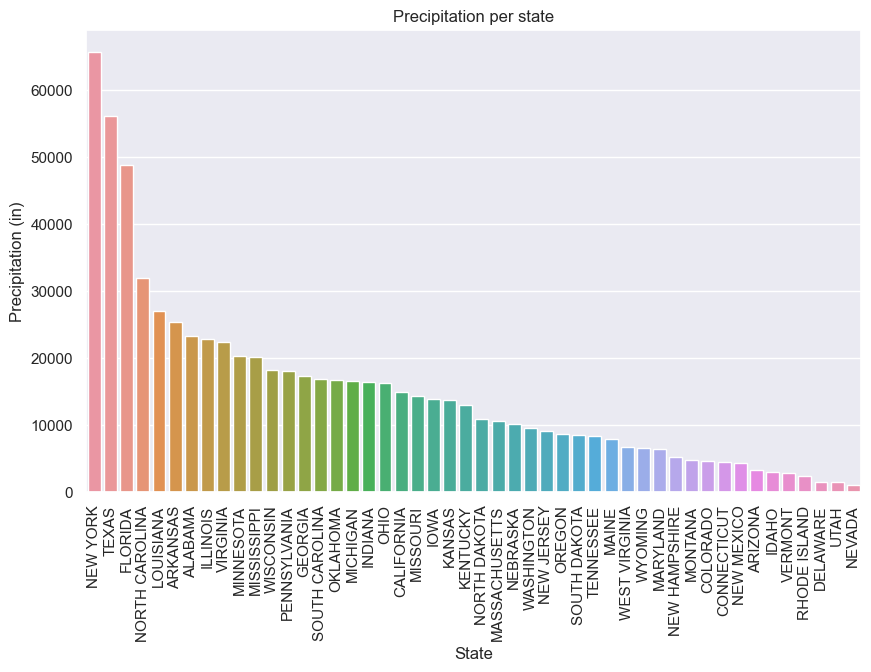

In [45]:
import seaborn as sb

ax = sb.barplot(x='StateFull', y='Precipitation_in', data=df, ci=False)
ax.set(xlabel='State', ylabel='Precipitation (in)', title='Precipitation per state')
ax.tick_params(axis='x', rotation=90)
sb.set(rc={'figure.figsize':(10,6)})

### Add lat, lon to states

In [47]:
url = 'https://www.latlong.net/category/states-236-14.html'
html = requests.get(url).content
df_list = pd.read_html(html)
stateslldf = df_list[-1]
stateslldf.columns =['StateFull', 'Lat', 'Lon']

In [48]:
stateslldf['StateFull'] = stateslldf.StateFull.str.replace(', USA', '')
stateslldf['StateFull'] = stateslldf.StateFull.str.replace(', the USA', '')
stateslldf['StateFull'] = stateslldf.StateFull.str.replace(', the US', '')
stateslldf['StateFull'] = stateslldf['StateFull'].str.upper()

In [50]:
stateslldf.head(5)

,StateFull,Lat,Lon
0,WISCONSIN,44.5,-89.500000
1,WEST VIRGINIA,39.0,-80.500000
2,VERMONT,44.0,-72.699997
3,TEXAS,31.0,-100.000000
4,SOUTH DAKOTA,44.5,-100.000000


In [51]:
df = pd.merge(df, stateslldf, on="StateFull")

In [52]:
df = df[['State', 'StateFull', 'Precipitation_in', 'Lat', 'Lon']]

In [53]:
df

,State,StateFull,Precipitation_in,Lat,Lon
0,NY,NEW YORK,65652.46,43.000000,-75.000000
1,TX,TEXAS,56028.68,31.000000,-100.000000
2,FL,FLORIDA,48836.69,27.994402,-81.760254
3,NC,NORTH CAROLINA,31967.81,35.782169,-80.793457
4,LA,LOUISIANA,27011.62,30.391830,-92.329102
5,AR,ARKANSAS,25333.09,34.799999,-92.199997
6,AL,ALABAMA,23244.34,32.318230,-86.902298
7,IL,ILLINOIS,22798.86,40.000000,-89.000000
8,VA,VIRGINIA,22397.97,37.926868,-78.024902
9,MN,MINNESOTA,20325.98,46.392410,-94.636230


In [22]:
df.to_csv('stateWeather.csv')